In [1]:
import os
import pandas as pd
from datetime import datetime,date,time,timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import string
from scipy import ndimage


0019[3190,4800],0047[340:1012]



In [2]:
#dia al azar
d=date(2017,3,1)
t=time(1,23,2)
t2=time(1,4,4)
dato1=datetime.combine(d,t)
dato2=datetime.combine(d,t2)



https://racelogic.support/01VBOX_Automotive/01General_Information/Knowledge_Base/VBO_file_format

In [126]:
base_dir='data_electrico'
data_file='VBS__047.VBO'

with open(os.path.join(base_dir,data_file),'r') as vboxdata:
    section = []
    
    dats=[]
    cols=[]
    
    for line in vboxdata:
        if line[0] == '[':
            section = str.replace(line, "\n","")
            continue
        if section == '[column names]':
            col_names =line.strip('\n')
            if col_names !="":
                #print(col_names)
                cols.append(col_names)
        if section =='[data]':
            linesplit=line.strip('\n').split(' ')
            linesplit=linesplit[:-1]   
            for idx,da in enumerate(linesplit): 
                if idx==1:
                    #manejo de tiempos
                    hora=int(linesplit[1][0:2])
                    minuto=int(linesplit[1][2:4])
                    seg=int(linesplit[1][4:6])
                    mili=int(linesplit[1][7:])*10000
                    tiempo=time(hora,minuto,seg,mili)
                    linesplit[idx]=datetime.combine(d,tiempo)
                else:
                    linesplit[idx]=float(linesplit[idx])
            dats.append(tuple(linesplit))
            
   
    
    datos=pd.DataFrame(dats,columns=cols)
datos=datos.drop(['sats','longacc','latacc','temp','Vbat','batt-flags','batt-ai','batt.soc','heading'],axis=1)
datos
nuevonombre={'time':'Tiempo','lat':'Latitude','long':'Longitude','velocity':'Velocidad','height':'Altura'}
datos.rename(columns=nuevonombre, inplace=True)
inicial=340
final=1553
datos=datos[:][inicial:final].reset_index().drop(['index'],axis=1)
t=[None]*len(datos.Tiempo)
t0=datos.Tiempo[0]
for i,tiempo in enumerate(datos.Tiempo):
   t[i]=(tiempo-t0).total_seconds()

datos.Tiempo=t
datos

,Tiempo,Latitude,Longitude,Velocidad,Altura
0,0.00,297.778242,4436.980038,38.31,2588.89
1,0.05,297.778440,4436.979828,38.60,2588.81
2,0.10,297.778638,4436.979612,38.86,2588.72
3,0.15,297.778848,4436.979402,39.20,2588.63
4,0.20,297.779058,4436.979192,39.54,2588.53
5,0.25,297.779268,4436.978982,39.84,2588.43
6,0.30,297.779490,4436.978772,40.15,2588.32
7,0.35,297.779712,4436.978550,40.53,2588.22
8,0.40,297.779928,4436.978340,40.89,2588.11
9,0.45,297.780180,4436.978118,41.11,2588.00


Graficar la velocidad en busqueda del momento en el que se empieza a mover el kart

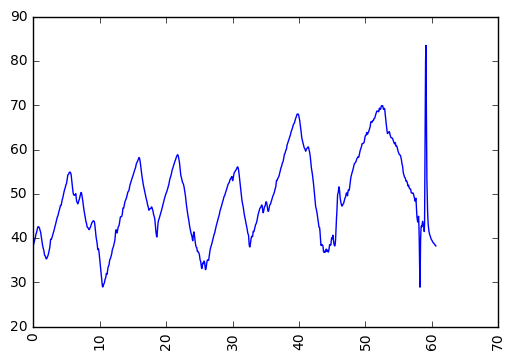

In [127]:
plt.plot(datos.Tiempo,datos.Velocidad)
plt.xticks(rotation=90)
plt.show()

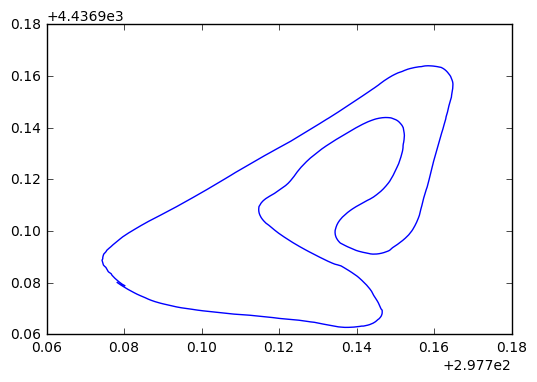

In [122]:
plt.plot(datos.Latitude,datos.Longitude)
plt.show()

In [63]:
def diferenciar(x,y):
    #Pasar todo como np array
    dy=np.gradient(y)
    dx=np.gradient(x)
    return dy/dx



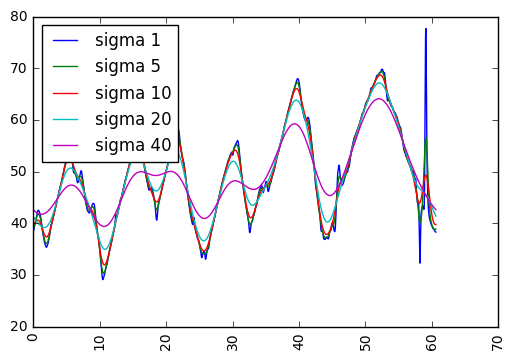

In [128]:
sigmas=[1,5,10,20,40]
vfiltros=[None]*len(sigmas)

for idx,des in enumerate(sigmas):
    vfiltros[idx]=ndimage.gaussian_filter1d(datos.Velocidad,sigma=des,order=0,mode='wrap')
    plt.plot(datos.Tiempo,vfiltros[idx],label='sigma %d' % des)
    plt.legend(loc=2)
    plt.xticks(rotation=90)
    
plt.show()

Se decide usar el filtro de sigma = 10

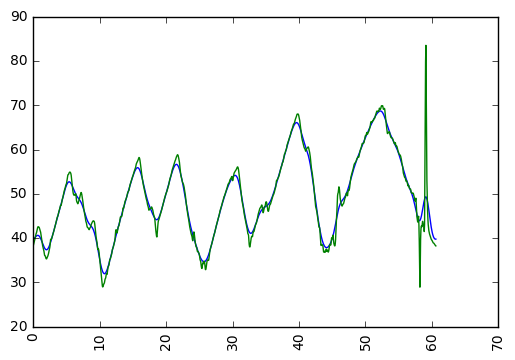

In [129]:
plt.plot(datos.Tiempo,vfiltros[2])
plt.plot(datos.Tiempo,datos.Velocidad)
plt.xticks(rotation=90)
plt.show()

In [135]:
vf=vfiltros[2]
aceleracion=np.gradient(vf/3.6)/0.05
len(aceleracion)
len(datos.Tiempo)

1213

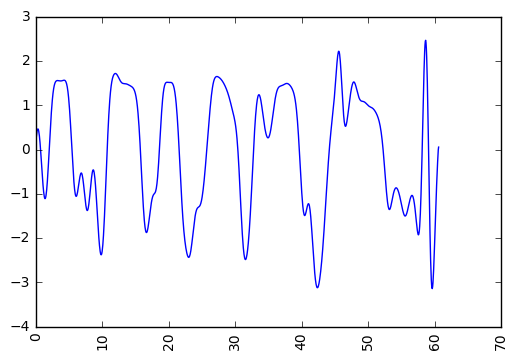

In [136]:
plt.plot(datos.Tiempo,aceleracion)

plt.xticks(rotation=90)
plt.show()